In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Comparison SMiLe estimate vs true mean

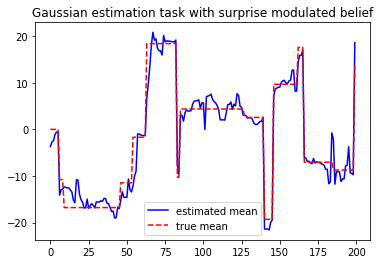

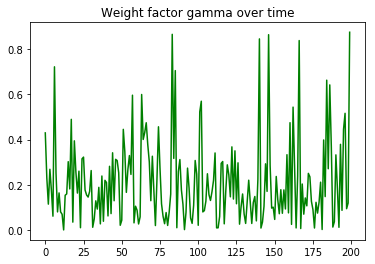

In [2]:
N = 200                       #number of data samples
sigma = 4                     #standard deviation of the gaussian distribution
m = 0.1                       #for now we consider this parameter as subject dependent
est_mean = 0                  #this is the parameter to be estimates
true_mean = 0                 #true mean of the gaussian distribution
est_vals = np.zeros(N)        #vector to store the estimates
real_vals = np.zeros(N)       #vector to store the true means
H = 0.066                     #hazard rate with which the true mean varies
gammas = np.zeros(N)          #vector to store the weight factor gamma

# Algorithm

np.random.seed(945)

for n in range(N):
    coin = np.random.rand()
    if(coin<H):
        real_vals[n] = -20+40*np.random.rand()
    else:
        real_vals[n] = true_mean
    true_mean = real_vals[n]
    data_sample = true_mean + sigma*np.random.randn()
    surprise = (data_sample-est_mean)**2/(2*sigma**2)
    gamma = np.sqrt(m*surprise/(1+m*surprise))
    gammas[n] = gamma
    est_mean = gamma*data_sample + (1-gamma)*est_mean
    est_vals[n] = est_mean

plt.figure()    
plt.plot(range(N),est_vals,'b-',label='estimated mean')
plt.plot(range(N),real_vals,'r--',label='true mean')
plt.title('Gaussian estimation task with surprise modulated belief')
plt.legend(loc='best')
plt.show()

plt.figure()
plt.plot(range(N),gammas,'g-')
plt.title('Weight factor gamma over time')
plt.show()

# Evaluation of optimal parameter for delta rule with fixed gamma

The optimal fixed gamma for delta rule w.r.t the different hazard rates are:  [0.325 0.4   0.7   0.8  ]


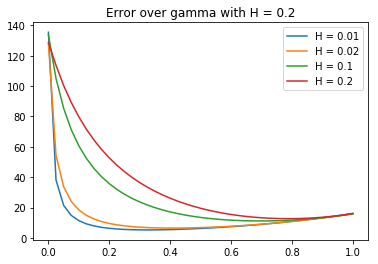

In [3]:
# Search for optimal fixed value of gamma with different hazard rates

H = [0.01, 0.02, 0.1, 0.2]
M = 41   #number of gammas considered
gammas = np.linspace(0,1,M)
best_gamma = np.zeros(4)
N = 10000
sigma = 4

np.random.seed(945)

for j,h in enumerate(H):
    err_mean = np.zeros(M)
    est_mean = np.zeros(M)
    true_mean = 0
    error = np.zeros([M,N])
    for n in range(N):
        coin = np.random.rand()
        if(coin<h):
            true_mean = -20+40*np.random.rand()
        data_sample = true_mean + sigma*np.random.randn()
        est_mean = gammas*data_sample + (1-gammas)*est_mean
        error[:,n] = (true_mean*np.ones(M)-est_mean)**2
    err_mean = np.mean(error,axis=1)
    plt.plot(gammas,err_mean,label="H = {}".format(h))
    plt.title("Error over gamma with H = {}".format(h))
    plt.legend(loc='best')
    best_gamma[j] = gammas[np.argmin(err_mean)]
    
print("The optimal fixed gamma for delta rule w.r.t the different hazard rates are:  {}".format(best_gamma))



# Comparison SMiLe vs fixed gamma delta rule

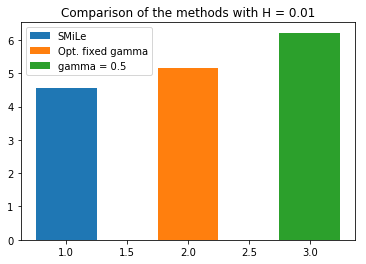

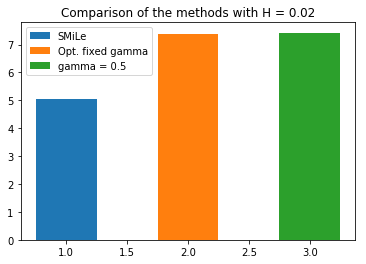

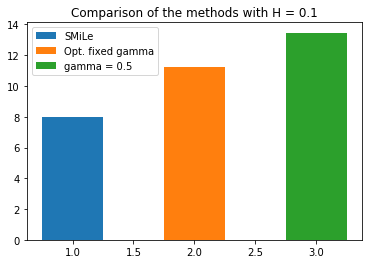

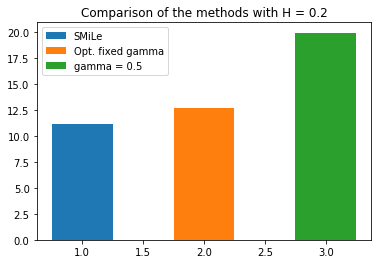

In [4]:
# Evaluate estimation error with different methods over different possible hazards

H = [0.01, 0.02, 0.1, 0.2]
trials = 50
gamma_cons = 0.5
N = 200
sigma = 4
m = 0.1  # subject dependent parameter
err_smile = np.zeros(4)
err_fix_opt = np.zeros(4)
err_cons = np.zeros(4)


for j,h in enumerate(H):
    e_smile = np.zeros(trials)
    e_fix_opt = np.zeros(trials)
    e_cons = np.zeros(trials)
    gamma_fix_opt = best_gamma[j]
    
    for i in range(trials):
        true_mean = 0
        est_mean_smile = 0
        est_mean_fix_opt = 0
        est_mean_cons = 0
        real_vals = np.zeros(N)
        smile_vals = np.zeros(N)
        fix_opt_vals = np.zeros(N)
        cons_vals = np.zeros(N)
        np.random.seed(100+i)
        
        for n in range(N):
            coin = np.random.rand()
            if(coin<h):
                true_mean = -20+40*np.random.rand()
            real_vals[n] = true_mean
            data_sample = true_mean + sigma*np.random.randn()
            surprise = (data_sample - est_mean_smile)**2/(2*sigma**2)
            gamma_smile = np.sqrt(m*surprise/(1+m*surprise))
            est_mean_smile = gamma_smile*data_sample + (1-gamma_smile)*est_mean_smile
            smile_vals[n] = est_mean_smile
            est_mean_fix_opt = gamma_fix_opt*data_sample + (1-gamma_fix_opt)*est_mean_fix_opt
            fix_opt_vals[n] = est_mean_fix_opt
            est_mean_cons = gamma_cons*data_sample + (1-gamma_cons)*est_mean_cons
            cons_vals[n] = est_mean_cons
        
        e_smile[i] = np.mean((real_vals-smile_vals)**2)
        e_fix_opt[i] = np.mean((real_vals-fix_opt_vals)**2)
        e_cons[i] = np.mean((real_vals-cons_vals)**2)
    
    err_smile[j] = np.mean(e_smile)
    err_fix_opt[j] = np.mean(e_fix_opt)
    err_cons[j] = np.mean(e_cons)
    
    plt.figure()
    plt.bar(1,err_smile[j],0.5,label="SMiLe")
    plt.bar(2,err_fix_opt[j],0.5,label="Opt. fixed gamma")
    plt.bar(3,err_cons[j],0.5,label="gamma = {}".format(gamma_cons))
    plt.title("Comparison of the methods with H = {}".format(h))
    plt.legend(loc='best')
    plt.show()


# Optimal m through surprise minimization given the previous data sample

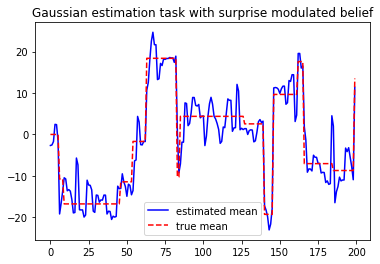

In [5]:
N = 200
sigma = 4
est_mean_m2 = 0                                # estimated mean two time steps before the current time
est_mean_m1 = 0                                # estimated mean one time step before the current time
data_sample_m1 = sigma*np.random.randn()
true_mean = 0
est_vals = np.zeros(N)
real_vals = np.zeros(N)
H = 0.066
m_values = np.zeros(N)                         #vector to store the values of the m parameter


np.random.seed(945)


for n in range(N):
    coin = np.random.rand()
    if(coin<H):
        true_mean = -20+40*np.random.rand()
    real_vals[n] = true_mean
    data_sample = true_mean + sigma*np.random.randn()
    surprise = (data_sample-est_mean_m1)**2/(2*sigma**2)
    # evaluation of optimal m through surprise minimisation
    diff = (data_sample-est_mean_m2)
    diff_m1 = (data_sample_m1-est_mean_m2)
    if(diff*diff_m1 <= 0):
        gamma = 0.1
        m = 2*gamma**2*sigma**2/((1-gamma**2)*diff_m1**2)
    elif(np.abs(diff) >= np.abs(diff_m1)):
        gamma = 0.9
        m = 2*gamma**2*sigma**2/((1-gamma**2)*diff_m1**2)
    else:
        m = 2*sigma**2 * diff**2 / (diff_m1**2 * (diff_m1**2-diff**2))
    m_values[n] = m
    gamma = np.sqrt(m*surprise/(1+m*surprise))
    est_mean = gamma*data_sample + (1-gamma)*est_mean_m1
    est_vals[n] = est_mean
    est_mean_m2 = est_mean_m1
    est_mean_m1 = est_mean
    data_sample_m1 = data_sample



plt.figure()    
plt.plot(range(N),est_vals,'b-',label='estimated mean')
plt.plot(range(N),real_vals,'r--',label='true mean')
plt.title('Gaussian estimation task with surprise modulated belief')
plt.legend(loc='best')
plt.show()
    

# Adapting m based on surprise 

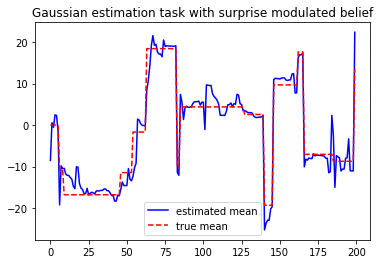

In [6]:
N = 200
sigma = 4
m = 1000
est_mean = 0
true_mean = 0
est_vals = np.zeros(N)
real_vals = np.zeros(N)
H = 0.066


np.random.seed(945)


for n in range(N):
    coin = np.random.rand()
    if(coin<H):
        real_vals[n] = -20+40*np.random.rand()
    else:
        real_vals[n] = true_mean
    true_mean = real_vals[n]
    data_sample = true_mean + sigma*np.random.randn()
    surprise = (data_sample-est_mean)**2/(2*sigma**2)
    alpha = 0.5
    m = alpha*m + (1-alpha)*surprise/12
    gamma = np.sqrt(m*surprise/(1+m*surprise))
    est_mean = gamma*data_sample + (1-gamma)*est_mean
    est_vals[n] = est_mean

plt.figure()    
plt.plot(range(N),est_vals,'b-',label='estimated mean')
plt.plot(range(N),real_vals,'r--',label='true mean')
plt.title('Gaussian estimation task with surprise modulated belief')
plt.legend(loc='best')
plt.show()


In [7]:
def func(param,surp):
    return np.sqrt(param*surp/(1+param*surp))
surp = 9./2
param = surp/12
print(func(param,surp))

0.7924058156930615


# Comparison betwwen SMiLe with different m values

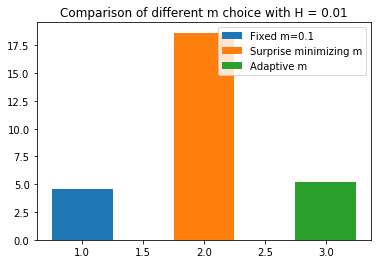

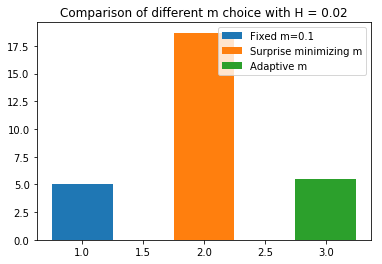

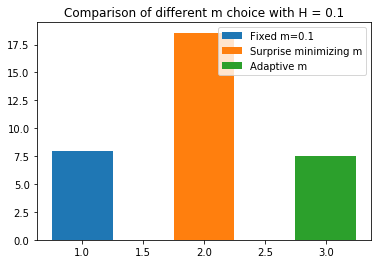

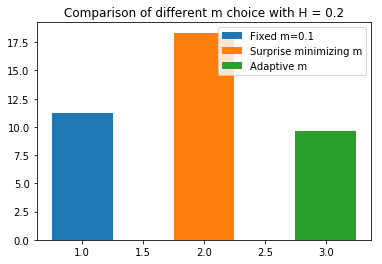

In [8]:
# Evaluate estimation error of SMiLe with different m values over different possible hazards

H = [0.01, 0.02, 0.1, 0.2]
trials = 50

N = 200
sigma = 4
alpha = 0.5
m_fixed = 0.1
m_grad = 0.1
m_adapt = 1000
err_fixed = np.zeros(4)
err_grad = np.zeros(4)
err_adapt = np.zeros(4)


for j,h in enumerate(H):
    e_fixed = np.zeros(trials)
    e_grad = np.zeros(trials)
    e_adapt = np.zeros(trials)
    
    for i in range(trials):
        true_mean = 0
        est_mean_fixed = 0
        est_mean_grad_m2 = 0
        est_mean_grad_m1 = 0
        est_mean_grad = 0
        data_sample_m1 = sigma*np.random.randn()
        est_mean_adapt = 0
        real_vals = np.zeros(N)
        fixed_vals = np.zeros(N)
        grad_vals = np.zeros(N)
        adapt_vals = np.zeros(N)
        np.random.seed(100+i)
        
        for n in range(N):
            coin = np.random.rand()
            if(coin<h):
                true_mean = -20+40*np.random.rand()
            real_vals[n] = true_mean
            data_sample = true_mean + sigma*np.random.randn()
            surprise_fixed = (data_sample - est_mean_fixed)**2/(2*sigma**2)
            surprise_grad = (data_sample - est_mean_grad)**2/(2*sigma**2)
            surprise_adapt = (data_sample - est_mean_adapt)**2/(2*sigma**2)
            gamma_fixed = np.sqrt(m_fixed*surprise_fixed/(1+m_fixed*surprise_fixed))
            est_mean_fixed = gamma_fixed*data_sample + (1-gamma_fixed)*est_mean_fixed
            fixed_vals[n] = est_mean_fixed
            diff = (data_sample-est_mean_grad_m2)
            diff_m1 = (data_sample_m1-est_mean_grad_m2)
            if(diff*diff_m1 <= 0):
                gamma_grad = 0.1
                m_grad = 2*gamma**2*sigma**2/((1-gamma**2)*diff_m1**2)
            elif(np.abs(diff) >= np.abs(diff_m1)):
                gamma_grad = 0.9
                m_grad = 2*gamma**2*sigma**2/((1-gamma**2)*diff_m1**2)
            else:
                m_grad = 2*sigma**2 * diff**2 / (diff_m1**2 * (diff_m1**2-diff**2))
            gamma_grad = np.sqrt(m_grad*surprise_grad/(1+m_grad*surprise_grad))
            est_mean_grad = gamma_grad*data_sample + (1-gamma_grad)*est_mean_grad_m1
            grad_vals[n] = est_mean_grad
            m_adapt = alpha*m_adapt + (1-alpha)*surprise_adapt/12
            gamma_adapt = np.sqrt(m_adapt*surprise_adapt/(1+m_adapt*surprise_adapt))
            est_mean_adapt = gamma_adapt*data_sample + (1-gamma_adapt)*est_mean_adapt
            adapt_vals[n] = est_mean_adapt
            est_mean_grad_m2 = est_mean_grad_m1
            est_mean_grad_m1 = est_mean_grad
            data_sample_m1 = data_sample
        
        e_fixed[i] = np.mean((real_vals-fixed_vals)**2)
        e_grad[i] = np.mean((real_vals-grad_vals)**2)
        e_adapt[i] = np.mean((real_vals-adapt_vals)**2)
    
    err_fixed[j] = np.mean(e_fixed)
    err_grad[j] = np.mean(e_grad)
    err_adapt[j] = np.mean(e_adapt)
    
    plt.figure()
    plt.bar(1,err_fixed[j],0.5,label="Fixed m={}".format(m_fixed))
    plt.bar(2,err_grad[j],0.5,label="Surprise minimizing m")
    plt.bar(3,err_adapt[j],0.5,label="Adaptive m")
    plt.title("Comparison of different m choice with H = {}".format(h))
    plt.legend(loc='best')
    plt.show()


# Adaptive m through gradient descent

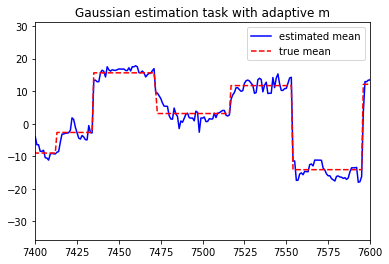

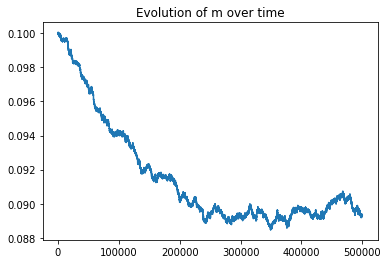

In [42]:
def grad_surprise(data_sample, data_sample_m1, est_mean_m2, sigma, m):
    surprise = (data_sample_m1-est_mean_m2)**2/(2*sigma**2)
    gamma = np.sqrt(m*surprise/(1+m*surprise))
    grad_gamma = (1./sigma**2)*(data_sample - gamma*data_sample_m1 - (1-gamma)*est_mean_m2)*(est_mean_m2 - data_sample_m1)
    dgamma_dm = (1./(2*gamma))*surprise/((1+m*surprise)**2)
    return grad_gamma*dgamma_dm



N = 500000
sigma = 4
m = 0.1
eta = 10**(-6)
est_mean_m1 = 0
est_mean_m2 = 0
data_sample_m1 = np.random.randn()
true_mean = 0
est_vals = np.zeros(N)
real_vals = np.zeros(N)
H = 0.05
m_values = np.zeros(N)


np.random.seed(945)


for n in range(N):
    #eta = 0.001/np.sqrt(n+1)
    coin = np.random.rand()
    if(coin<H):
        true_mean = -20+40*np.random.rand()
    real_vals[n] = true_mean
    data_sample = true_mean + sigma*np.random.randn()
    surprise = (data_sample - est_mean_m1)**2/(2*sigma**2)
    m = m - eta*grad_surprise(data_sample, data_sample_m1, est_mean_m2, sigma, m)
    if(m<0.001):
        m=0.001
    m_values[n] = m
    gamma = np.sqrt(m*surprise/(1+m*surprise))
    est_mean = gamma*data_sample + (1-gamma)*est_mean_m1
    est_vals[n] = est_mean
    est_mean_m2 = est_mean_m1
    est_mean_m1 = est_mean
    data_sample_m1 = data_sample
    
plt.figure()    
plt.plot(range(N),est_vals,'b-',label='estimated mean')
plt.plot(range(N),real_vals,'r--',label='true mean')
plt.title('Gaussian estimation task with adaptive m')
plt.legend(loc='best')
plt.xlim([7400,7600])
plt.show()

plt.figure()
plt.plot(range(N),m_values)
plt.title('Evolution of m over time')
plt.show()

# Error of adaptive SMiLe with different learing and hazard rates

In [6]:
def adaptive_smile_get(H, eta_0, N, m, time_adapt = 0):
    """Evaluate the error committed by the adaptive SMiLe algorithm on the gaussian estimation task
    H = hazard rate
    eta_0 = learning rate used in gradient descent at time 0
    N = Duration of the task in time steps
    m = initial value for parameter m in SMiLe algorithm
    time_adapt = flag to indicate if the learning rate should change in time"""
    
    trials = 1
    sigma = 4
    error = np.zeros(trials)
    
    for i in range(trials):
        np.random.seed(100+i)
        est_mean_m1 = 0
        est_mean_m2 = 0
        data_sample_m1 = np.random.randn()
        true_mean = 0
        est_vals = np.zeros(N)
        real_vals = np.zeros(N)
        
        for n in range(N):
            if(time_adapt):
                eta = eta_0/np.sqrt(n+1)
            else:
                eta = eta_0
            coin = np.random.rand()
            if(coin<H):
                true_mean = -20+40*np.random.rand()
            real_vals[n] = true_mean
            data_sample = true_mean + sigma*np.random.randn()
            surprise = (data_sample - est_mean_m1)**2/(2*sigma**2)
            m = m - eta*grad_surprise(data_sample, data_sample_m1, est_mean_m2, sigma, m)
            if(m<0.001):
                m=0.001
            gamma = np.sqrt(m*surprise/(1+m*surprise))
            est_mean = gamma*data_sample + (1-gamma)*est_mean_m1
            est_vals[n] = est_mean
            est_mean_m2 = est_mean_m1
            est_mean_m1 = est_mean
            data_sample_m1 = data_sample
            
        error[i] = np.mean((est_vals-real_vals)**2)
    
    return np.mean(error)


In [16]:
# evaluate error with fixed learning rate starting from m not optimal

N = 100000
m = 0.3
eta_values = np.logspace(-8,-3,6)
H_values = np.linspace(0.02,0.3,15)
error = np.zeros([H_values.shape[0],eta_values.shape[0]])

for i,H in enumerate(H_values):
    for j,eta in enumerate(eta_values):
        error[i,j] = adaptive_smile_get(H,eta,N,m)
        
print(error)

[[ 7.18354465  7.13977459  6.62730161  4.59714749  4.33916434 10.49731132]
 [ 7.48372068  7.44705516  7.03747728  5.71048954  5.54236771 12.08741587]
 [ 7.7951963   7.76375098  7.4248146   6.4712419   6.3588482  11.99264944]
 [ 8.09459861  8.06774041  7.78814689  7.10855151  7.04523365 13.09658217]
 [ 8.41628016  8.39337613  8.16246495  7.71114223  7.67351785 12.18135594]
 [ 8.70699843  8.68738239  8.49621914  8.23148444  8.22644435 12.97061395]
 [ 8.99254377  8.97569262  8.81752952  8.7074595   8.72946048 11.12365352]
 [ 9.29094389  9.27662061  9.14890809  9.20447048  9.25597195 12.8751564 ]
 [ 9.59589448  9.58368698  9.4822197   9.70184392  9.77660259 11.97384478]
 [ 9.88294616  9.87246684  9.79655916 10.22524683 10.32228321 14.72834247]
 [10.15112274 10.1428095  10.09992482 10.77002838 10.89147773 13.31069965]
 [10.42727514 10.4213728  10.41434139 11.34203997 11.48400023 13.3767037 ]
 [10.71205119 10.70875416 10.74550669 12.00323407 12.16698299 13.43643484]
 [10.96134741 10.96094544

In [43]:
# evaluate error with fixed learning rate starting from m quasi-optimal

N = 100000
m = 0.1
eta_values = np.logspace(-8,-3,6)
H_values = np.linspace(0.02,0.3,15)
error = np.zeros([H_values.shape[0],eta_values.shape[0]])

for i,H in enumerate(H_values):
    for j,eta in enumerate(eta_values):
        error[i,j] = adaptive_smile_get(H,eta,N,m)
        
print(error)

[[ 4.80213673  4.73290849  4.39672618  4.28905964  4.31037547 10.49385664]
 [ 5.59453626  5.57844653  5.51903906  5.50102684  5.5240688  12.08542318]
 [ 6.32404666  6.32367175  6.3230201   6.32586654  6.34570986 11.99215762]
 [ 7.05414175  7.04856052  7.03063105  7.02514594  7.03739412 13.21608012]
 [ 7.79261097  7.76779642  7.69279981  7.66196946  7.66842483 12.18085936]
 [ 8.49013982  8.43720384  8.28571587  8.22298647  8.22501078 11.91922653]
 [ 9.13828007  9.056679    8.82724806  8.73168012  8.73203274 12.27092394]
 [ 9.81311861  9.70305403  9.39743258  9.27032377  9.26282948 13.41015635]
 [10.44815312 10.31343012  9.94316647  9.79346905  9.78461242 11.97418749]
 [11.06759874 10.92190092 10.51722537 10.35545875 10.33226276 14.72830404]
 [11.66973933 11.52123438 11.10455959 10.94099758 10.90462956 13.31160593]
 [12.2785792  12.12867306 11.70797494 11.55294939 11.50486835 13.37877807]
 [12.9052919  12.77034231 12.38612067 12.26102287 12.1913136  13.43567654]
 [13.47098535 13.37765959

In [9]:
# evaluate error with learning rate changing in time
N = 100000
m = 0.3
eta_values = np.logspace(-5,-1,5)
H_values = np.linspace(0.02,0.3,15)
error_t_adapt = np.zeros([H_values.shape[0],eta_values.shape[0]])

for i,H in enumerate(H_values):
    for j,eta in enumerate(eta_values):
        error_t_adapt[i,j] = adaptive_smile_get(H,eta,N,m,time_adapt = 1)
        
print(error_t_adapt)

[[ 7.16131067  7.06751233  5.77414486  4.39358462 11.13192792]
 [ 7.49580116  7.41219368  6.42686985  5.61357989 14.13583141]
 [ 7.81072966  7.74025307  6.98017874  6.46146937 11.67567063]
 [ 8.03948492  7.97893438  7.37945554  6.98016022 15.16669517]
 [ 8.30235726  8.25027083  7.7723704   7.51122999 14.64858614]
 [ 8.56940909  8.52629757  8.16572237  8.06568696 11.90098737]
 [ 8.89538967  8.8578428   8.57803978  8.56851775 11.21460329]
 [ 9.25598037  9.22592061  9.04058147  9.17279597 13.06670029]
 [ 9.52021091  9.49692984  9.38361485  9.61512961 15.14750008]
 [ 9.84959721  9.83358506  9.82050565 10.18692131 12.20621712]
 [10.12514358 10.11239485 10.18632762 11.25578563 12.88455995]
 [10.41721349 10.40920172 10.5788872  11.3525047  15.24072348]
 [10.67687357 10.67487074 11.07074932 12.55095983 13.68270668]
 [10.83222649 10.83258447 11.28449906 11.64808471 13.92747805]
 [11.09622132 11.10293545 11.88597889 13.55196221 13.66833616]]


# Double stochastic process

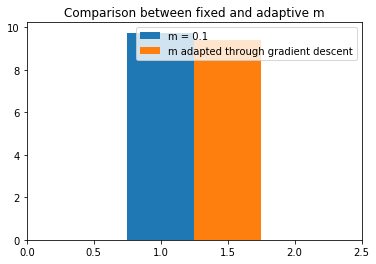

In [88]:
# comparison between using a fixed m or an adaptive one when in presence of a double stochastic level

N = 500000
sigma = 4
m_fixed = 0.1
m = 0.1
eta = 10**(-6)
est_mean_m1 = 0
est_mean_m2 = 0
est_mean_m1_fixed = 0
data_sample_m1 = np.random.randn()
true_mean = 0
H = 0.05
H_2 = 0.5
real_vals = np.zeros(N)
est_vals_fixed = np.zeros(N)
est_vals_adapt = np.zeros(N)

np.random.seed(945)

for n in range(N):
    coin_2 = np.random.rand()
    if(coin_2<H_2):
        H = 0.01 + 0.3*np.random.rand()
    coin = np.random.rand()
    if(coin<H):
        true_mean = -20 + 40*np.random.rand()
    real_vals[n] = true_mean
    data_sample = true_mean + sigma*np.random.randn()
    surprise = (data_sample-est_mean_m1)**2/(2*sigma**2)
    surprise_fixed = (data_sample-est_mean_m1_fixed)**2/(2*sigma**2)
    m = m - eta*grad_surprise(data_sample, data_sample_m1, est_mean_m2, sigma, m)
    if(m<0.001):
        m = 0.001
    gamma = np.sqrt(m*surprise/(1+m*surprise))
    gamma_fixed = np.sqrt(m_fixed*surprise_fixed/(1+m_fixed*surprise_fixed))
    est_mean = gamma*data_sample + (1-gamma)*est_mean_m1
    est_mean_fixed = gamma_fixed*data_sample + (1-gamma_fixed)*est_mean_m1_fixed
    est_vals_adapt[n] = est_mean
    est_vals_fixed[n] = est_mean_fixed
    est_mean_m2 = est_mean_m1
    est_mean_m1 = est_mean
    est_mean_m1_fixed = est_mean_fixed
    data_sample_m1 = data_sample
    
error_fixed = np.mean((real_vals-est_vals_fixed)**2)
error_adapt = np.mean((real_vals-est_vals_adapt)**2)

plt.figure()
plt.bar(1,error_fixed,0.5,label="m = {}".format(m_fixed))
plt.bar(1.5,error_adapt,0.5,label="m adapted through gradient descent")
plt.title("Comparison between fixed and adaptive m")
plt.legend(loc="best")
plt.xlim([0,2.5])
plt.show()